In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fbprophet import Prophet
import datetime as dt
import seaborn as sns

In [68]:
df = pd.read_csv('avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [70]:
year, month, day = [], [], []
for i in df["Date"]:
  ts = pd.to_datetime(i)
  year.append(ts.year)
  month.append(ts.month)
  day.append(ts.day)

df["year"] = year
df["month"] = month
df["day"] = day
df["Date"] = pd.to_datetime(df["Date"])

In [71]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [72]:
df = df[["Date", "AveragePrice","region","year" ,"month","day","type"]]
df.head()

,Date,AveragePrice,region,year,month,day,type
0,2015-12-27,1.33,Albany,2015,12,27,conventional
1,2015-12-20,1.35,Albany,2015,12,20,conventional
2,2015-12-13,0.93,Albany,2015,12,13,conventional
3,2015-12-06,1.08,Albany,2015,12,6,conventional
4,2015-11-29,1.28,Albany,2015,11,29,conventional


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


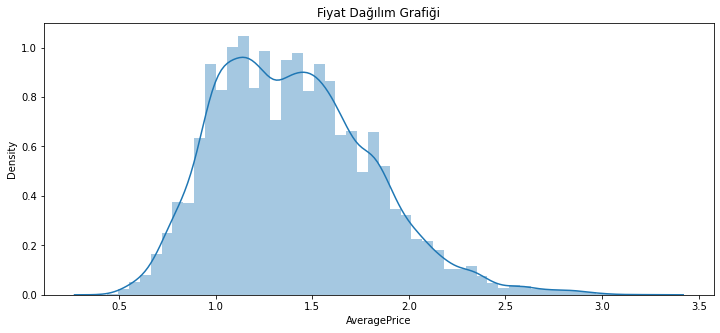

In [76]:
plt.figure(figsize=(12,5))
plt.title("Fiyat Dağılım Grafiği")
sns.distplot(df["AveragePrice"]);

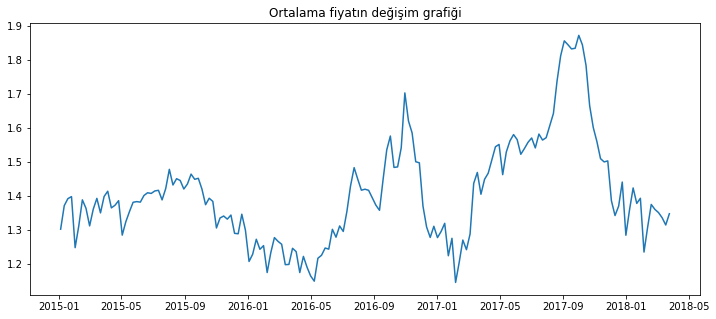

In [106]:
date_grouped = df.groupby(["Date"]).mean()[["AveragePrice"]]
plt.figure(figsize=(12,5))
plt.plot(date_grouped.index, date_grouped["AveragePrice"].values)
plt.title('Ortalama fiyatın değişim grafiği')
plt.show()
# date_grouped.plot();

In [108]:
year_grouped = df.groupby(["year"]).mean()[["AveragePrice"]]
month_grouped = df.groupby(["month"]).mean()[["AveragePrice"]]
day_grouped = df.groupby(["day"]).mean()[["AveragePrice"]]

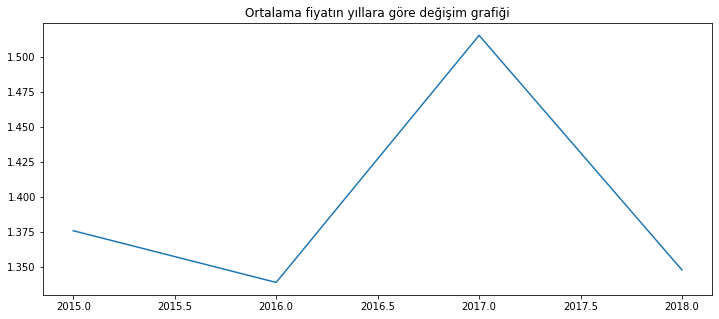

In [116]:
plt.figure(figsize=(12,5))
plt.plot(year_grouped.index, year_grouped["AveragePrice"].values)
plt.title('Ortalama fiyatın yıllara göre değişim grafiği')
plt.show()

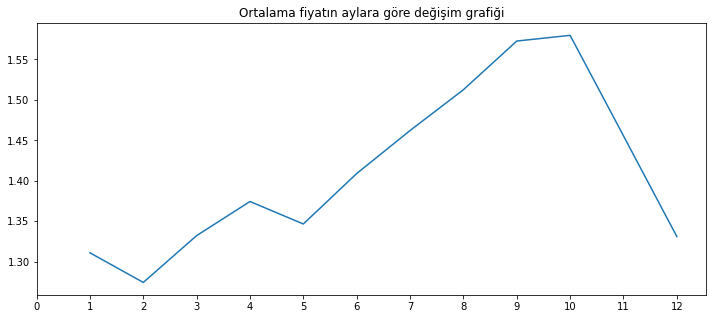

In [119]:
fig, ax = plt.subplots(figsize=(12,5))
plt.plot(month_grouped.index, month_grouped["AveragePrice"].values)
ax.xaxis.set(ticks=range(0,13)) # Manually set x-ticks
plt.title('Ortalama fiyatın aylara göre değişim grafiği')
plt.show()

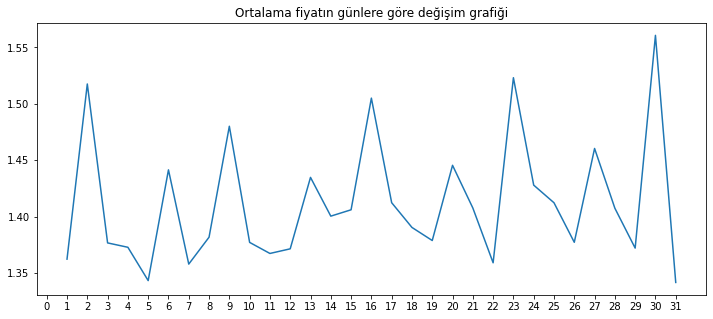

In [123]:
fig, ax = plt.subplots(figsize=(12,5))
plt.plot(day_grouped.index, day_grouped["AveragePrice"].values)
ax.xaxis.set(ticks=range(0,32)) # Manually set x-ticks
plt.title('Ortalama fiyatın günlere göre değişim grafiği')
plt.show()

In [142]:
data = df[["Date","AveragePrice"]]

In [143]:
data = data.rename(columns={
    'Date': 'ds',
    'AveragePrice': 'y'
})
data.head()

,ds,y
0,2015-12-27,1.33
1,2015-12-20,1.35
2,2015-12-13,0.93
3,2015-12-06,1.08
4,2015-11-29,1.28


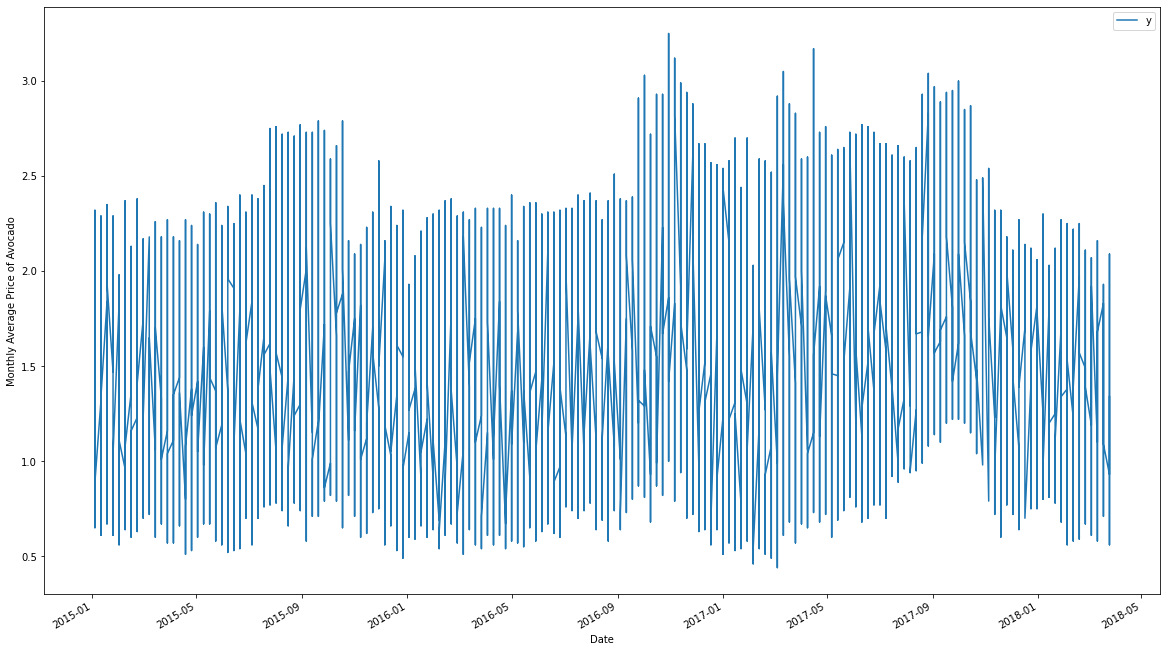

In [144]:
ax =  data.set_index('ds').plot(figsize=(20, 12))
ax.set_ylabel('Monthly Average Price of Avocado')
ax.set_xlabel('Date')
plt.show()

In [185]:
my_model = Prophet()
my_model.fit(data)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [186]:
future_dates = my_model.make_future_dataframe(periods=900)
forecast = my_model.predict(future_dates)

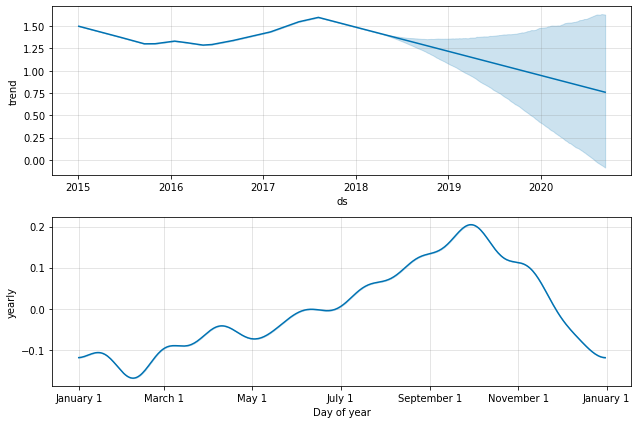

In [187]:
fig2 = my_model.plot_components(forecast)

In [199]:
forecast_df = forecast[["ds","yhat"]]
forecast_df.head()

,ds,yhat
0,2015-01-04,1.381543
1,2015-01-11,1.384864
2,2015-01-18,1.380074
3,2015-01-25,1.356095
4,2015-02-01,1.322901


In [200]:
mask = (forecast_df['ds'] > "2018-03-24") & (forecast_df['ds'] <= "2020-09-10")
forecastedvalues = forecast_df.loc[mask]

mask = (forecast_df['ds'] > "2015-01-04") & (forecast_df['ds'] <= "2018-03-25")
forecast_df = forecast_df.loc[mask]

Text(0.5, 0, 'Tarih')

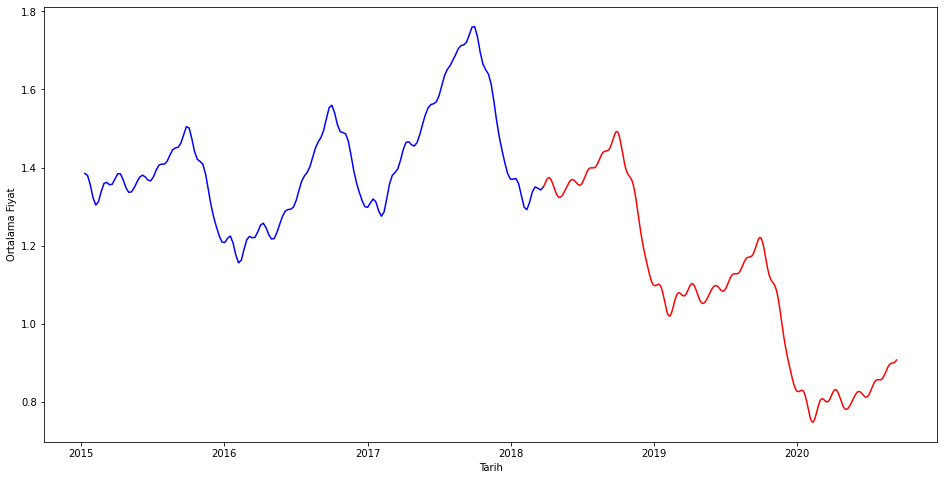

In [201]:
fig, ax1 = plt.subplots(figsize=(16, 8))
ax1.plot(forecast_df.set_index('ds'), color='b')
ax1.plot(forecastedvalues.set_index('ds'), color='r')
ax1.set_ylabel('Ortalama Fiyat')
ax1.set_xlabel('Tarih')